In [1]:
import tensorflow as lf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [48]:
print("MNIST Veri Seti Yükleniyor")
(x_train,y_train) ,(X_test,y_test) = keras.datasets.mnist.load_data()


MNIST Veri Seti Yükleniyor


In [50]:
x_train=x_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

x_train=x_train.astype('float')/255.0
X_test= X_test.astype('float')/255.0


print(f"eğitim verilerinin boyutu ve sayısı = {x_train.shape}")
print(f"test verilerinin boyutu ve sayısı = {X_test.shape}")



eğitim verilerinin boyutu ve sayısı = (60000, 28, 28, 1)
test verilerinin boyutu ve sayısı = (10000, 28, 28, 1)


In [52]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [54]:
X_train, X_val, y_train_split, y_val = train_test_split(
    x_train,
    y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

print(f" veri bölme sonrası boyutlar:")
print(f"eğitim verisi boyutu:{X_train.shape}")
print(f" validation verisi boyutu:{X_val.shape}")


 veri bölme sonrası boyutlar:
eğitim verisi boyutu:(48000, 28, 28, 1)
 validation verisi boyutu:(12000, 28, 28, 1)


In [56]:
model=keras.Sequential([
        keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    keras.layers.BatchNormalization(),
        keras.layers.Conv2D(32,(3,3),activation='relu'),
     keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),


            keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.BatchNormalization(),
        keras.layers.Conv2D(64,(3,3),activation='relu'),
     keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),


  keras.layers.Flatten(),
        keras.layers.Dense(512,activation='relu'),
     keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax'),



])

In [58]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    
)

In [60]:
model_checkpoint=keras.callbacks.ModelCheckpoint(
    'two_blocks_cnn_for_mnist_dataset.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',verbose =1)

In [62]:
history = model.fit(X_train,y_train_split,validation_data=(X_val,y_val),
          batch_size=128, epochs=5, callbacks=model_checkpoint,
          verbose=1)

Epoch 1/5
375/375 [==============================] - ETA: 0s - loss: 0.1885 - accuracy: 0.9439
Epoch 1: val_accuracy improved from -inf to 0.26467, saving model to two_blocks_cnn_for_mnist_dataset.h5
375/375 [==============================] - 31s 80ms/step - loss: 0.1885 - accuracy: 0.9439 - val_loss: 3.9315 - val_accuracy: 0.2647
Epoch 2/5
375/375 [==============================] - ETA: 0s - loss: 0.0624 - accuracy: 0.9803
Epoch 2: val_accuracy improved from 0.26467 to 0.98892, saving model to two_blocks_cnn_for_mnist_dataset.h5
375/375 [==============================] - 31s 83ms/step - loss: 0.0624 - accuracy: 0.9803 - val_loss: 0.0353 - val_accuracy: 0.9889
Epoch 3/5
375/375 [==============================] - ETA: 0s - loss: 0.0451 - accuracy: 0.9857
Epoch 3: val_accuracy improved from 0.98892 to 0.99042, saving model to two_blocks_cnn_for_mnist_dataset.h5
375/375 [==============================] - 31s 84ms/step - loss: 0.0451 - accuracy: 0.9857 - val_loss: 0.0327 - val_accuracy: 0.

In [72]:
print("test verisi üzerinde model değerlendirmesi başlıyor...")
test_loss,test_accuracy = model.evaluate(X_test,y_test)
print(f"Modelin hata oranı={test_loss}")
print(f"Modelin doğruluk oranı={test_accuracy}")


test verisi üzerinde model değerlendirmesi başlıyor...
313/313 [==============================] - 2s 7ms/step - loss: 0.0264 - accuracy: 0.9913
Modelin hata oranı=0.026415694504976273
Modelin doğruluk oranı=0.9912999868392944


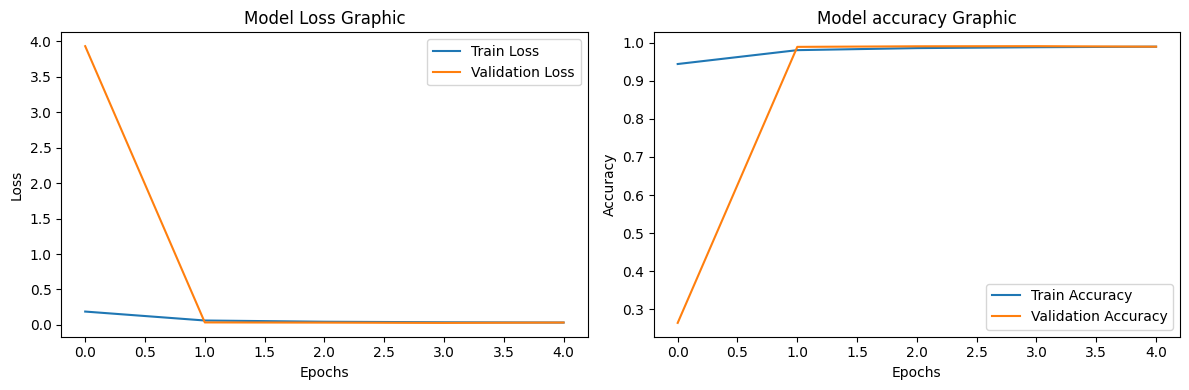

In [74]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history["loss"],label="Train Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.title("Model Loss Graphic")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"],label="Train Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.title("Model accuracy Graphic")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()



In [84]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns 
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis=1)
y_test_classes= np.argmax(y_test,axis=1)

313/313 [==============================] - 2s 8ms/step


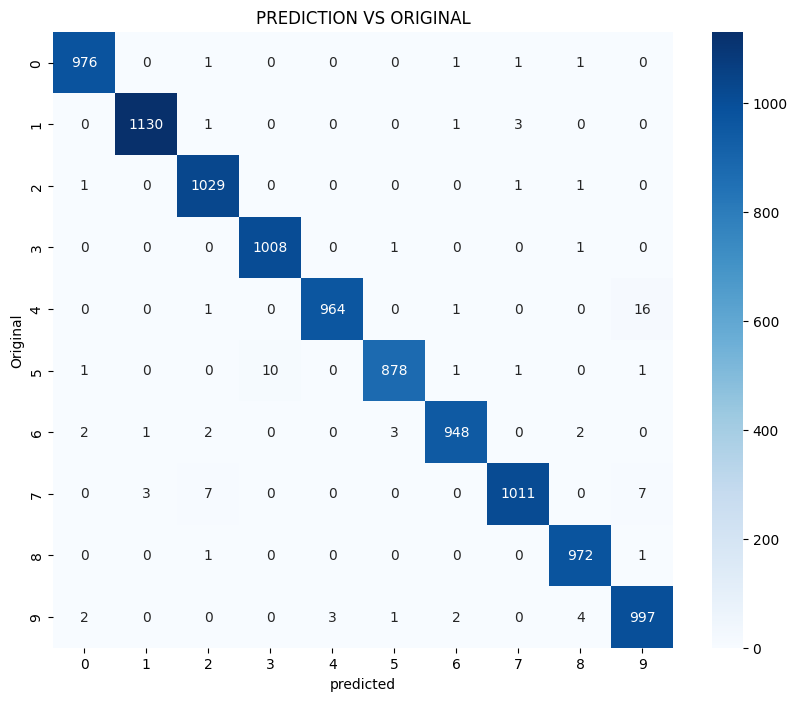

In [86]:
cm=confusion_matrix(y_test_classes,y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm,fmt='d',annot=True ,cmap="Blues")
plt.title("PREDICTION VS ORIGINAL")
plt.xlabel("predicted")
plt.ylabel("Original")
plt.show()          